# pinnFoam - Grid Search analysis

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
from matplotlib import rcParams
import os
rcParams["figure.dpi"] = 200

file_pattern = "pinnFoam"
file_extension = "csv"
data_files = [file for file in os.listdir(os.curdir) if
              file_pattern in file and 
              file.endswith(file_extension) and 
              "global-dframe" not in file]                            
data_files.sort()

# Concat data_files in a dframe that contains everything
global_dframe = pd.DataFrame()
for i,file in enumerate(data_files):
    df = pd.read_csv(file)
    # Insert the study metadata information into the dataframe.
    df["TRAINING_ID"] = i
    global_dframe = pd.concat([global_dframe,df])
        
# Write global_dframe as csv
global_dframe.to_csv(file_pattern + "-global-dframe.csv")
    
# Optimal parameters = row in the global data frame with minimal validation MSE mean
optimal_hyperparams = global_dframe.loc[global_dframe["VALIDATION_MSE_MEAN"] == 
                                        global_dframe["VALIDATION_MSE_MEAN"].min()]
   
print("Optimal hyperparameters :\n", optimal_hyperparams) 

Optimal hyperparameters :
      HIDDEN_LAYERS  OPTIMIZER_STEP  EPSILON  MAX_ITERATIONS  DELTA_X   EPOCH  \
2997   20,20,20,20           0.001  0.00001            3000   0.0625  2998.0   

      TRAINING_MSE_MEAN  TRAINING_MSE_MAX  VALIDATION_MSE_MEAN  \
2997           0.000341          0.000341             0.000333   

      VALIDATION_MSE_MAX  TRAINING_ID  
2997            0.000333            2  


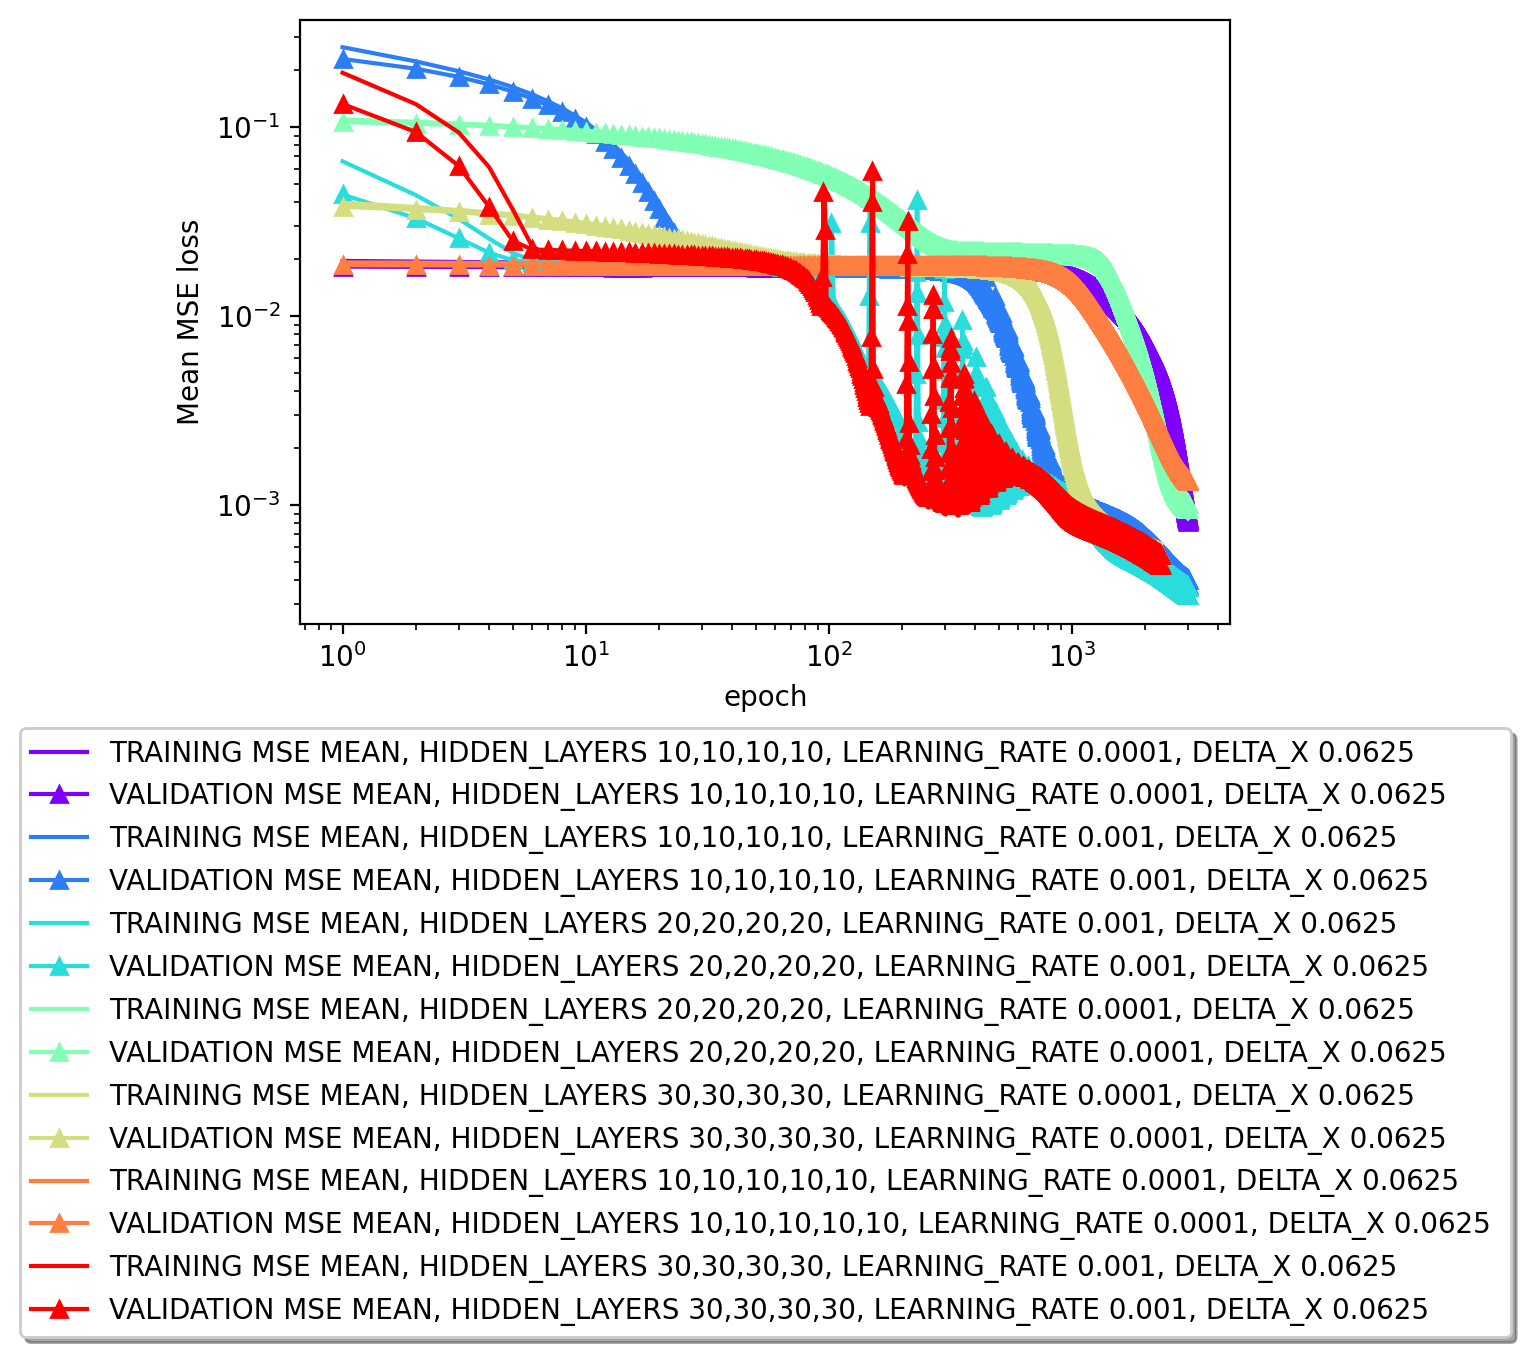

In [28]:
# Plot learning rates to make sure there's no overfitting

color = iter(cm.rainbow(np.linspace(0, 1, len(data_files))))

for i in range(len(data_files)):
    training = global_dframe[global_dframe["TRAINING_ID"] == i]
    hidden_layers = training["HIDDEN_LAYERS"].unique()[0]
    optimizer_step = training["OPTIMIZER_STEP"].unique()[0]
    delta_x = training["DELTA_X"].unique()[0]
        
    c = next(color)

    plt.plot(training["EPOCH"], training["TRAINING_MSE_MEAN"],c=c,
             label = "TRAINING MSE MEAN, HIDDEN_LAYERS %s, LEARNING_RATE %s, DELTA_X %s" % 
             (hidden_layers, optimizer_step, delta_x))
    plt.plot(training["EPOCH"], training["VALIDATION_MSE_MEAN"],c=c,marker='^',
             label = "VALIDATION MSE MEAN, HIDDEN_LAYERS %s, LEARNING_RATE %s, DELTA_X %s " % 
             (hidden_layers, optimizer_step, delta_x))
    
    
plt.loglog()
plt.ylabel("Mean MSE loss")
plt.xlabel("epoch")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)